In [106]:
#from the py_geospatial environment
import glob
import os
import baseflow #this is the baseflow package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
#flow data
src = "W:/VUB/_main_research/mHM/model_validation_data/waterinfo_csv/waterinfo_timeseries"

#### Baseflow filter with different methods

In [157]:
datafiles = glob.glob(src + "/*.csv")
#extract the station name
station_names = [os.path.basename(file).split('_')[0] for file in datafiles]

for name, file in zip(station_names, datafiles):
    df = pd.read_csv(datafiles[0], dayfirst=True, index_col=0, parse_dates=True)
    station_name = os.path.basename(file).split('_')[0]
    dfs, bfi = baseflow.separation(df, return_bfi=True)
    
    # print(f'Best Method:\n{df_kge.idxmax(axis=1)}')

100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


In [158]:
bfi

,UKIH,Local,Fixed,Slide,LH,Chapman,CM,Boughton,Furey,Eckhardt,EWMA,Willems
Q,0.701854,0.714417,0.739013,0.740925,0.704355,0.493641,0.494045,0.684911,0.667782,0.68481,0.693678,0.678561


In [159]:
dfs

{'UKIH':                     Q
 DATE                 
 1968-12-31  12.550000
 1969-01-01  12.700750
 1969-01-02  13.505819
 1969-01-03  13.596147
 1969-01-04  13.454456
 ...               ...
 2024-10-30  12.926099
 2024-10-31  12.831000
 2024-11-01  12.754459
 2024-11-02  12.713875
 2024-11-03  12.700000
 
 [20397 rows x 1 columns],
 'Local':                     Q
 DATE                 
 1968-12-31  12.550000
 1969-01-01  12.700750
 1969-01-02  13.505819
 1969-01-03  13.596147
 1969-01-04  13.454456
 ...               ...
 2024-10-30  12.926099
 2024-10-31  12.831000
 2024-11-01  12.754459
 2024-11-02  12.713875
 2024-11-03  12.700000
 
 [20397 rows x 1 columns],
 'Fixed':                 Q
 DATE             
 1968-12-31  12.55
 1969-01-01  12.55
 1969-01-02  12.55
 1969-01-03  12.55
 1969-01-04  12.55
 ...           ...
 2024-10-30  14.05
 2024-10-31  14.05
 2024-11-01  12.70
 2024-11-02  12.70
 2024-11-03  12.70
 
 [20397 rows x 1 columns],
 'Slide':                 Q
 DATE         

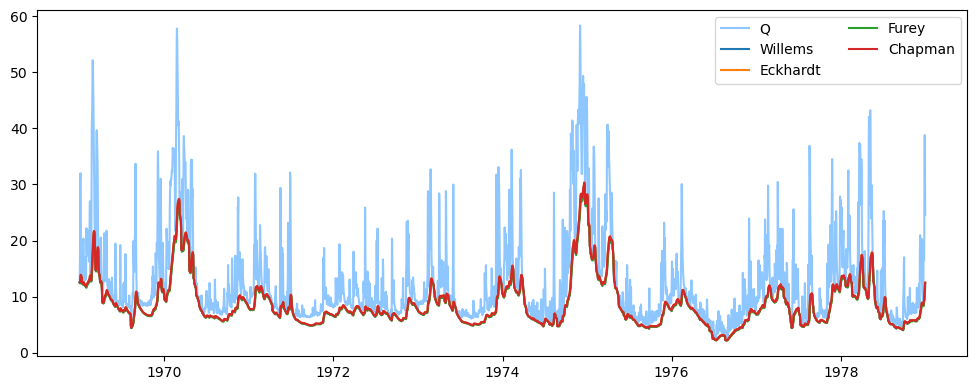

In [162]:
fig,ax = plt.subplots(figsize=(12, 4.5))
#plot the hydrograph
min_date = df.index.min()
max_date = '1979-01-01'


plt.plot(df['Q'][min_date:max_date], label='Q', c='dodgerblue', alpha=0.5)

#plot the baseflow
plt.plot(dfs['Willems'][min_date:max_date], label='Willems')
plt.plot(dfs['Eckhardt'][min_date:max_date], label='Eckhardt')
plt.plot(dfs['Furey'][min_date:max_date], label='Furey')
plt.plot(dfs['Boughton'][min_date:max_date], label='Chapman')

#plt.ylim(0, 70)
plt.legend(ncol=2)